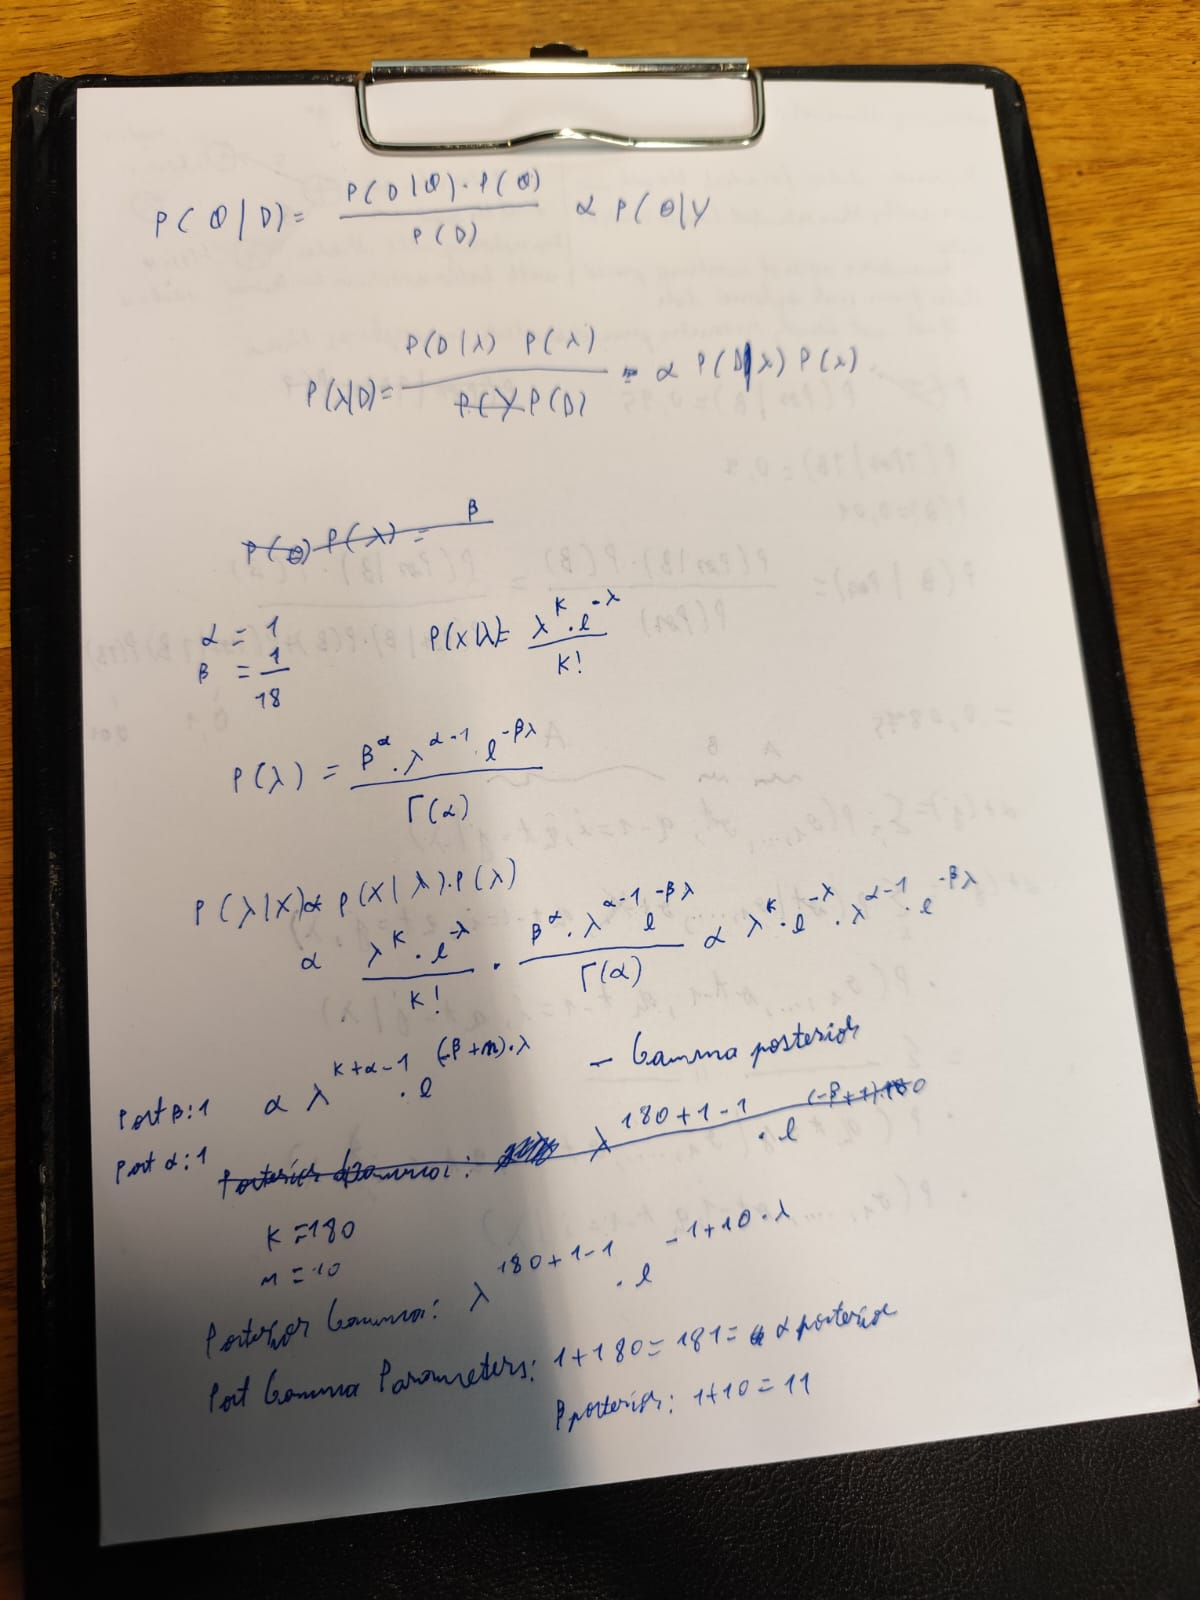

In [7]:
from IPython.display import Image
Image(filename='calc.jpg')

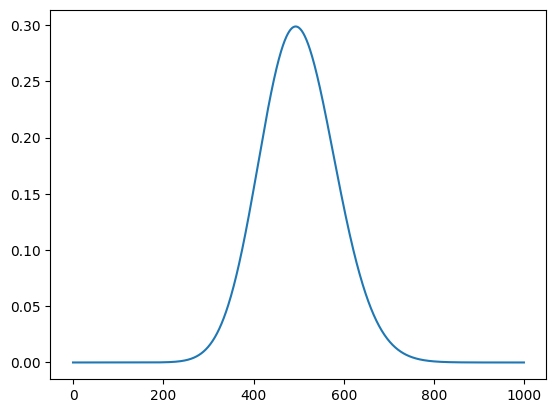

Posterior Mean: 18.00 calls/hour
Posterior Mode: 17.90 calls/hour
Posterior Standard Deviation: 1.34
94% HDI: [15.51, 20.53] calls/hour


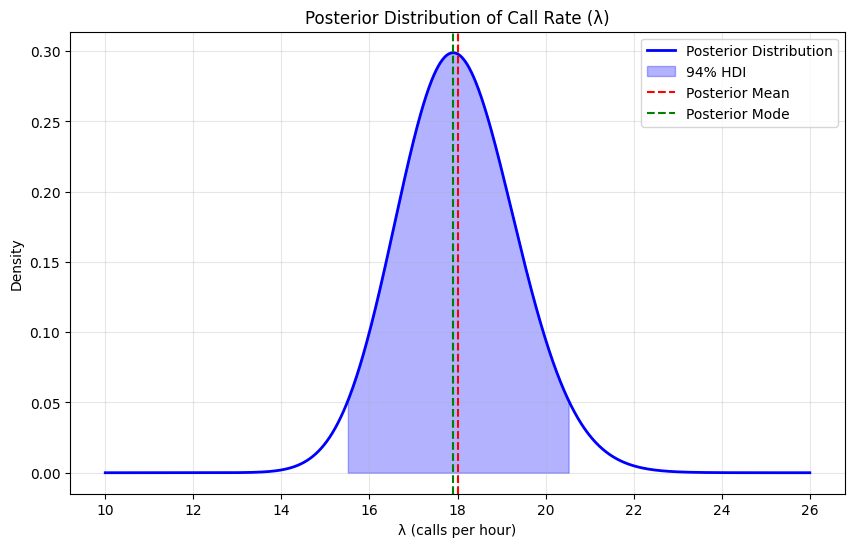

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Function to calculate HDI bounds
def hdi_bounds(alpha, beta, probability=0.94):
    def objective(x):
        return stats.gamma.cdf(x[1], alpha, scale=1/beta) - \
               stats.gamma.cdf(x[0], alpha, scale=1/beta) - probability
    
    def constraint(x):
        return stats.gamma.pdf(x[0], alpha, scale=1/beta) - \
               stats.gamma.pdf(x[1], alpha, scale=1/beta)
    
    # Initial guess using quantiles
    x0 = [stats.gamma.ppf(0.03, alpha, scale=1/beta),
          stats.gamma.ppf(0.97, alpha, scale=1/beta)]
    
    result = fsolve(lambda x: [objective(x), constraint(x)], x0)
    return result

# Data
total_calls = 180
n_hours = 10
observed_mean = total_calls / n_hours

# Prior parameters (using relatively uninformative prior)
alpha_prior = 1
beta_prior = 1/18

# Posterior parameters
alpha_post = alpha_prior + total_calls  # 181
beta_post = beta_prior + n_hours        # 10.056

# Calculate posterior statistics
posterior_mean = alpha_post / beta_post
posterior_mode = (alpha_post - 1) / beta_post
posterior_var = alpha_post / (beta_post**2)
posterior_std = np.sqrt(posterior_var)

# Calculate 94% HDI
hdi_low, hdi_high = hdi_bounds(alpha_post, beta_post)

# Create visualization
x = np.linspace(10, 26, 1000)
posterior = stats.gamma.pdf(x, alpha_post, scale=1/beta_post)

plt.plot(posterior)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, posterior, 'b-', lw=2, label='Posterior Distribution')
plt.fill_between(x, posterior, where=(x >= hdi_low) & (x <= hdi_high), 
                 alpha=0.3, color='blue', label='94% HDI')
plt.axvline(posterior_mean, color='r', linestyle='--', label='Posterior Mean')
plt.axvline(posterior_mode, color='g', linestyle='--', label='Posterior Mode')

plt.title('Posterior Distribution of Call Rate (λ)')
plt.xlabel('λ (calls per hour)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Print results
print(f"Posterior Mean: {posterior_mean:.2f} calls/hour")
print(f"Posterior Mode: {posterior_mode:.2f} calls/hour")
print(f"Posterior Standard Deviation: {posterior_std:.2f}")
print(f"94% HDI: [{hdi_low:.2f}, {hdi_high:.2f}] calls/hour")

plt.show()